In [1]:
# Importação das bibliotecas

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## Objetivo do Projeto:

Obter um modelo para prever os custos e valores para um Plano de Saúde

In [2]:
# Carregando o Pycaret

!pip install pycaret

     |████████████████████████████████| 266kB 12.7MB/s 
     |████████████████████████████████| 174kB 21.8MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 14.2MB 271kB/s 
     |████████████████████████████████| 276kB 54.1MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 112kB 46.0MB/s 
     |████████████████████████████████| 2.0MB 43.8MB/s 
     |████████████████████████████████| 1.4MB 42.9MB/s 
     |████████████████████████████████| 6.8MB 52.9MB/s 
     |████████████████████████████████| 256kB 62.6MB/s 
     |████████████████████████████████| 1.7MB 34.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.2MB 33.8MB/s 
     |████████████████████████████████| 1.1MB 42.5MB/s 
     |████████████████████████████████| 61kB 5.7MB/

In [3]:
from pycaret.datasets import get_data

In [5]:
dados = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
from pycaret.regression import *

In [7]:
# configurações de pré processamento e validação dos modelos 

regressao = setup(data = dados,
                 target = 'charges',
                 normalize = True,
                 combine_rare_levels = True,
                 remove_outliers = True,
                 session_id = 1)

,Description,Value
0,session_id,1
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(889, 12)"


### Criando um modelo inicial básico com Random Forest

In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [9]:
floresta = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3065.8718,3.410690e+07,5840.1113,0.7570,0.5776,0.2456
1,2942.7974,2.453240e+07,4953.0192,0.8183,0.5449,0.3843
2,1887.0997,1.072326e+07,3274.6397,0.8990,0.4367,0.4087
3,3451.8831,2.988716e+07,5466.9152,0.7851,0.5286,0.4453
4,3129.8362,2.904193e+07,5389.0566,0.7399,0.5266,0.3780
5,2444.9832,1.858563e+07,4311.1050,0.8608,0.3952,0.2622
6,2873.0122,2.437362e+07,4936.9651,0.8232,0.5056,0.3708
7,3048.1831,3.200634e+07,5657.4143,0.7605,0.4838,0.3586
8,2703.9166,2.434650e+07,4934.2169,0.8649,0.5006,0.3070
9,2991.1387,2.284806e+07,4779.9642,0.8724,0.5506,0.5570


In [10]:
# Ajustando o modelo RF através do método RandomSearch

floresta_adj = tune_model(floresta, optimize = 'RMSLE', n_iter = 20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2696.4318,3.329798e+07,5770.4400,0.7628,0.5702,0.1859
1,2059.5067,2.166329e+07,4654.3843,0.8396,0.4584,0.1522
2,741.1999,5.263039e+06,2294.1314,0.9504,0.1833,0.1074
3,2289.6780,2.389938e+07,4888.6992,0.8281,0.4241,0.1961
4,2159.5583,2.590000e+07,5089.2045,0.7680,0.4466,0.1532
5,1956.6747,1.905930e+07,4365.6962,0.8572,0.3877,0.1323
6,1687.1545,1.634743e+07,4043.1951,0.8814,0.3570,0.1429
7,2357.3341,3.268202e+07,5716.8190,0.7554,0.4302,0.1489
8,1992.6189,2.684985e+07,5181.6844,0.8510,0.5183,0.1357
9,1376.5790,1.358980e+07,3686.4346,0.9241,0.2701,0.1264


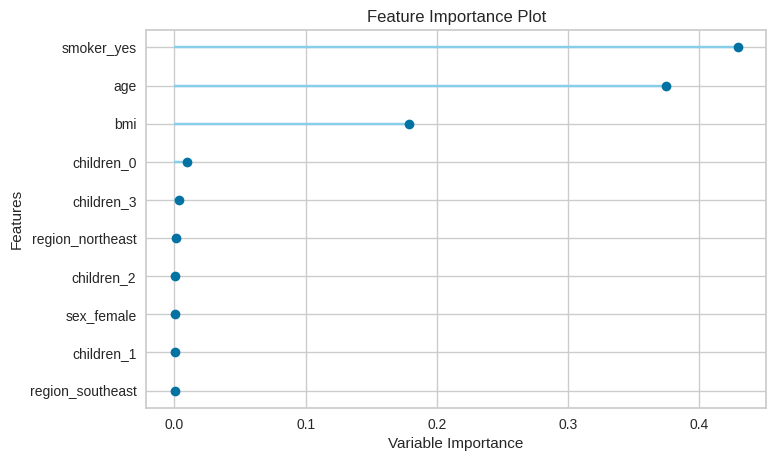

In [11]:
# Verificando a importância das variáveis no modelo ajustado

plot_model(floresta_adj, plot = 'feature')

Analisando as variáveis acima, vemos claramente que "smoker_yes" (fumantes) e "age" (idade), são fatores importantes na predição e composição dos valores do plano de saúde. 

Vamos agora avaliar outros modelos de machine learning disponíveis e selecionar os 3 melhores, nas suas configurações padrão:

In [12]:
modelos = compare_models(sort = 'RMSLE', n_select = 4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2618.5105,2.193915e+07,4620.8009,0.8411,0.4538,0.3272,0.062
huber,Huber Regressor,3265.7950,4.565352e+07,6709.2974,0.6664,0.4712,0.2083,0.021
par,Passive Aggressive Regressor,3336.9808,4.546264e+07,6692.3543,0.6682,0.4780,0.2061,0.049
rf,Random Forest Regressor,2853.8722,2.504518e+07,4954.3408,0.8181,0.5050,0.3717,0.460
et,Extra Trees Regressor,2807.6434,2.814747e+07,5262.9452,0.7960,0.5151,0.3584,0.438
llar,Lasso Least Angle Regression,4073.6879,3.619571e+07,5980.3384,0.7386,0.5516,0.4146,0.013
br,Bayesian Ridge,4084.1088,3.618358e+07,5978.8591,0.7388,0.5565,0.4161,0.012
ridge,Ridge Regression,4090.1057,3.618378e+07,5978.8549,0.7388,0.5570,0.4173,0.011
lasso,Lasso Regression,4074.6998,3.618339e+07,5978.9157,0.7387,0.5596,0.4143,0.019
lr,Linear Regression,4074.4778,3.618304e+07,5978.8538,0.7387,0.5635,0.4142,0.010


In [13]:
modelos_tunados = [tune_model(i, optimize = 'RMSE') for i in modelos]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3474.9678,3.095859e+07,5564.0440,0.7794,0.5621,0.4332
1,2933.9666,2.169018e+07,4657.2716,0.8394,0.5159,0.4266
2,1903.1726,7.956352e+06,2820.7007,0.9251,0.4507,0.4446
3,2910.4811,2.255009e+07,4748.6931,0.8378,0.4875,0.3942
4,2900.8299,2.425016e+07,4924.4455,0.7828,0.4774,0.3461
5,2530.0888,1.876938e+07,4332.3648,0.8594,0.4110,0.2762
6,2316.3615,1.593210e+07,3991.5034,0.8845,0.4033,0.3062
7,3270.5129,3.251829e+07,5702.4807,0.7566,0.5102,0.3990
8,2815.7774,2.567825e+07,5067.3715,0.8575,0.5083,0.3282
9,2207.4804,1.391474e+07,3730.2465,0.9223,0.4539,0.4196


In [14]:
# vamos combinar os 5 modelos tunados em um único preditor

modelo_combinado = blend_models(modelos_tunados)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3306.7330,3.691595e+07,6075.8499,0.7370,0.5491,0.2694
1,3233.0700,2.919196e+07,5402.9581,0.7838,0.4680,0.2814
2,1809.9217,1.049050e+07,3238.9035,0.9012,0.2853,0.2476
3,3094.7600,2.986138e+07,5464.5563,0.7853,0.4423,0.2953
4,2939.5133,2.809112e+07,5300.1053,0.7484,0.4327,0.2512
5,2608.2511,2.247848e+07,4741.1478,0.8316,0.3734,0.2152
6,2660.3547,2.123945e+07,4608.6275,0.8460,0.3681,0.2329
7,3361.2841,3.410585e+07,5840.0212,0.7448,0.4182,0.2798
8,2952.7253,2.832948e+07,5322.5442,0.8428,0.4936,0.2722
9,2530.0846,1.959233e+07,4426.3220,0.8905,0.3637,0.3082


In [15]:
# verificando a performance nos dados de validação

pred = predict_model(modelo_combinado)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2889.9723,2.752640e+07,5246.5611,0.8058,0.3886,0.255


In [16]:
# Aplicando o modelo final em todos os dados disponíveis

modelo_final = finalize_model(modelo_combinado)

In [17]:
# Salvando o modelo final

save_model(modelo_final, 'final_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                                     ccp_alpha=0.0,
                                                                     criterion='mse',
                                                                     max_depth=3,
                                                             

In [18]:
# Fazendo um deploy básico

def CustoSeguro (age, sex, bmi, children, smoker, region):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region]}
    dados = pd.DataFrame(dados0)
    
    modelo = load_model('./final_model')
    
    pred = float(predict_model(modelo, data = dados)['Label'].round(2))
    valor = round(1.8*pred, 2)
    
    print(' ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Fumante: {}'.format(smoker))
    print('Região: {}'.format(region))
    print(' ')
    print('Custo do Seguro: ${}'.format(pred))
    print('Valor de Venda: ${}'.format(valor))
          

In [19]:
# Testando o deploy

CustoSeguro(age = 32, sex = 'female', bmi = 25, children = 0, smoker = 'no', region = 'southwest')

Transformation Pipeline and Model Successfully Loaded
 
Idade: 32
Sexo: female
IMC: 25
Crianças: 0
Fumante: no
Região: southwest
 
Custo do Seguro: $4394.5
Valor de Venda: $7910.1
